In [2]:
import os 
import pandas as pd

from obspy.clients.fdsn.client import FDSNNoDataException ,Client
from obspy.core import UTCDateTime, read
#from obspy.clients.syngine.client import Client

In [3]:
main_path = os.path.abspath("")
main_path

'c:\\Users\\Mark\\Desktop\\Computation Scineces\\Research Project-20231106T125923Z-001\\code'

In [4]:
file_path = os.path.join(main_path, 'earthquakes.txt')
df = pd.read_csv(file_path, sep='\s+')
df = df[df['ident.'] == 'MI']
df

,Year,month,day,hour,minute,second,lat(WGS84),lng(WGS84),depth[km],mag.[ML],ML-std-dev,"mag.[MA],","MA-std-dev,",ident.
15,2007,1,1,17,0,35.48,-20.96675,-68.77356,6.46,1.437,0.016,1.628,0.016,MI
16,2007,1,1,17,21,31.12,-21.00206,-68.82029,4.77,1.704,0.031,1.939,0.031,MI
17,2007,1,1,17,32,13.06,-20.03404,-69.24281,8.44,1.833,0.020,2.076,0.017,MI
58,2007,1,3,15,44,31.23,-20.98417,-68.85387,3.76,1.371,0.015,1.512,0.013,MI
59,2007,1,3,17,19,0.52,-20.96850,-68.70245,1.01,1.641,0.027,1.811,0.028,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182789,2021,12,29,18,31,35.56,-20.98640,-68.78960,1.84,1.829,0.039,1.984,0.037,MI
182793,2021,12,29,20,37,41.40,-22.25642,-68.82379,5.97,1.823,0.024,1.973,0.028,MI
182813,2021,12,30,18,13,22.04,-22.77989,-69.25157,3.18,1.838,0.023,1.923,0.022,MI
182816,2021,12,30,21,50,46.68,-22.31516,-68.89218,13.48,1.900,0.025,2.007,0.019,MI


In [5]:
max_lat = df['lat(WGS84)'].max()
min_lat = df['lat(WGS84)'].min()

max_lng = df['lng(WGS84)'].max()
min_lng = df['lng(WGS84)'].min()

In [45]:
client = Client("GEOFON")

#inventory = client.get_stations(network="CX", longitude=-68.89, latitude=-22.50, maxradius=2.5, level="station")
inventory = client.get_stations(maxlatitude=max_lat, minlatitude=min_lat, maxlongitude=max_lng, minlongitude=min_lng, level = "station")
geofon_waveforms_10 = []
dt = 100
# for network in inventory:
#     for station in network:
for index, row in df.iloc[13000:13001,:].iterrows():
    time_stamp = UTCDateTime(row['Year'],row['month'],row['day'],row['hour'],row['minute'],row['second'])
    t1 =  time_stamp - dt
    t2 = time_stamp + dt
    try:
        waveform = client.get_waveforms("GE", "LVC", "10", "BH*", t1, t2)
        geofon_waveforms_10.append(waveform)
        print(f"time stamp {time_stamp}")
        print(f"start time {t1}, end time {t2}")
    except FDSNNoDataException:
        print(f"No 10 waveform for {t1}")

time stamp 2017-02-02T18:13:29.760000Z
start time 2017-02-02T18:11:49.760000Z, end time 2017-02-02T18:15:09.760000Z


In [47]:
geofon_waveforms_10

[3 Trace(s) in Stream:
GE.LVC.10.BH1 | 2017-02-02T18:11:49.769538Z - 2017-02-02T18:15:09.769538Z | 40.0 Hz, 8001 samples
GE.LVC.10.BH2 | 2017-02-02T18:11:49.769538Z - 2017-02-02T18:15:09.769538Z | 40.0 Hz, 8001 samples
GE.LVC.10.BHZ | 2017-02-02T18:11:49.769538Z - 2017-02-02T18:15:09.769538Z | 40.0 Hz, 8001 samples]

In [48]:
stream = geofon_waveforms_10[0]
trace = stream[0]

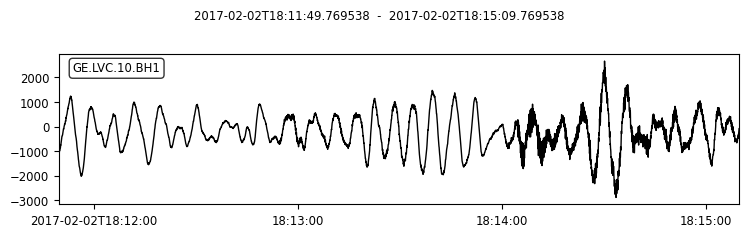

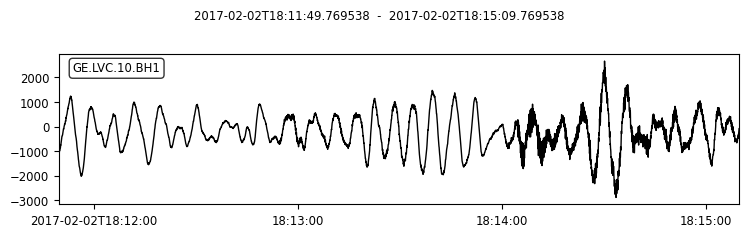

In [49]:
trace.plot()